In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

games = pd.read_csv('data/steam.csv')

# convert datatypes
games['release_date'] = pd.to_datetime(games['release_date'])
games['english'] = games['english'].astype('boolean')
games['required_age'] = games['required_age'].astype('category')
games['developer'] = games['developer'].astype('category')
games['publisher'] = games['publisher'].astype('category')

# split the tags, categories, genres and platforms into lists
games.steamspy_tags = games.steamspy_tags.str.split(',')
games.categories = games.categories.str.split(',')
games.genres = games.genres.str.split(',')
games.platforms = games.platforms.str.split(',')

# convert lists to tuples
games['genres'] = games['genres'].apply(lambda x: tuple(x))
games['categories'] = games['categories'].apply(lambda x: tuple(x))
games['steamspy_tags'] = games['steamspy_tags'].apply(lambda x: tuple(x))
games['platforms'] = games['platforms'].apply(lambda x: tuple(x))

def calculate_middle_owner(owners_str):
    lower, upper = map(int, owners_str.split("-"))
    return (upper - lower) / 2

games['owners'] = games['owners'].apply(calculate_middle_owner)

# Written by Braydon

In [ ]:
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi

uri = ""

# Create a new client and connect to the server
client = MongoClient(uri, server_api=ServerApi('1'))

# Send a ping to confirm a successful connection
try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)
    
# Written by Braydon

In [38]:
# check the data types of the columns
games.info()

# Written by Braydon

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   appid             27075 non-null  int64         
 1   name              27075 non-null  object        
 2   release_date      27075 non-null  datetime64[ns]
 3   english           27075 non-null  boolean       
 4   developer         27074 non-null  category      
 5   publisher         27061 non-null  category      
 6   platforms         27075 non-null  object        
 7   required_age      27075 non-null  category      
 8   categories        27075 non-null  object        
 9   genres            27075 non-null  object        
 10  steamspy_tags     27075 non-null  object        
 11  achievements      27075 non-null  int64         
 12  positive_ratings  27075 non-null  int64         
 13  negative_ratings  27075 non-null  int64         
 14  average_playtime  2707

In [80]:
# Check how many games are on each platform
games['platforms'].value_counts()

# Written by Braydon

platforms
(windows,)               18398
(windows, mac, linux)     4623
(windows, mac)            3439
(windows, linux)           610
(mac,)                       3
(mac, linux)                 1
(linux,)                     1
Name: count, dtype: int64

In [ ]:
# show how many missing values are in each column of the dataframe
games.isnull().sum()

# Francisco

In [ ]:
# calculate the percentage of missing values in the dataframe
missing_values = games.isnull().sum().sort_values(ascending=False)
percentage_missing = (missing_values / games.shape[0]) * 100
percentage_missing

# Francisco

In [ ]:
# calculate the total percentage of missing values across the dataframe
total_missing = (games.isnull().sum().sum() / (games.shape[0] * games.shape[1])) * 100
total_missing

# Francisco

In [ ]:
# find the exact lines in the dataframe that contain missing values
games[games.isnull().any(axis=1)]

# Francisco

In [ ]:
# replace the developer of The Battle of Ages with Green Desert
games.loc[23071, 'developer'] = 'Green Desert'

# Francisco

In [ ]:
# replace the missing publishers with the developer name
games.fillna({'publisher': games['developer']}, inplace=True)

# Francisco

In [ ]:
# list all required ages in order from lowest to highest
games['required_age'].sort_values().unique()

# Francisco

In [ ]:
# check the number of unique values in each column
games['genres'].explode().value_counts()
# Written by Braydon

In [ ]:
games['categories'].explode().value_counts()
# Written by Braydon

In [ ]:
games['steamspy_tags'].explode().value_counts()
# Written by Braydon

In [ ]:
games['platforms'].explode().value_counts()
# Written by Braydon

In [ ]:
# plot the number of games per genre
fig = px.bar(games['genres'].explode().value_counts(), x=games['genres'].explode().value_counts().index, y=games['genres'].explode().value_counts().values)
fig.update_layout(title='Number of games per genre', xaxis_title='Genre', yaxis_title='Number of games')
fig.show()

# Written by Braydon

In [81]:
# plot the price distribution, removing the outliers
fig = px.box(games[games.price < 100], y='price')
fig.update_layout(title='Price distribution', yaxis_title='Price')
fig.show()

# Written by Braydon

In [ ]:
# find the average playtime per genre
fig = px.bar(games.explode('genres').groupby('genres')['average_playtime'].mean().sort_values(ascending=False), x=games.explode('genres').groupby('genres')['average_playtime'].mean().sort_values(ascending=False).index, y=games.explode('genres').groupby('genres')['average_playtime'].mean().sort_values(ascending=False).values)
fig.update_layout(title='Average playtime per genre', xaxis_title='Genre', yaxis_title='Average playtime')
fig.show()

# Written by Braydon

In [40]:
# find games with lowest playtime
games.sort_values(by='positive_ratings', ascending=False).head(10)

# Written by Braydon

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
25,730,Counter-Strike: Global Offensive,2012-08-21,True,"Valve,Hidden Path Entertainment",Valve,"(windows, mac, linux)",0,"(Multi-player, Steam Achievements, Full contro...","(Action, Free to Play)","(FPS, Multiplayer, Shooter)",167,2644404,402313,22494,6502,25000000.0,0.00
22,570,Dota 2,2013-07-09,True,Valve,Valve,"(windows, mac, linux)",0,"(Multi-player, Co-op, Steam Trading Cards, Ste...","(Action, Free to Play, Strategy)","(Free to Play, MOBA, Strategy)",0,863507,142079,23944,801,50000000.0,0.00
19,440,Team Fortress 2,2007-10-10,True,Valve,Valve,"(windows, mac, linux)",0,"(Multi-player, Cross-Platform Multiplayer, Ste...","(Action, Free to Play)","(Free to Play, Multiplayer, FPS)",520,515879,34036,8495,623,15000000.0,0.00
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,True,PUBG Corporation,PUBG Corporation,"(windows,)",0,"(Multi-player, Online Multi-Player, Stats)","(Action, Adventure, Massively Multiplayer)","(Survival, Shooter, Multiplayer)",37,496184,487076,22938,12434,25000000.0,26.99
121,4000,Garry's Mod,2006-11-29,True,Facepunch Studios,Valve,"(windows, mac, linux)",0,"(Single-player, Multi-player, Co-op, Cross-Pla...","(Indie, Simulation)","(Sandbox, Multiplayer, Funny)",29,363721,16433,12422,1875,5000000.0,6.99
2478,271590,Grand Theft Auto V,2015-04-13,True,Rockstar North,Rockstar Games,"(windows,)",18,"(Single-player, Multi-player, Steam Achievemen...","(Action, Adventure)","(Open World, Action, Multiplayer)",77,329061,139308,9837,4834,5000000.0,24.99
1467,218620,PAYDAY 2,2013-08-13,True,OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,"(windows, linux)",18,"(Single-player, Multi-player, Co-op, Online Co...","(Action, RPG)","(Co-op, Action, FPS)",1130,308657,56523,3975,890,5000000.0,7.49
3362,304930,Unturned,2017-07-07,True,Smartly Dressed Games,Smartly Dressed Games,"(windows, mac, linux)",0,"(Single-player, Online Multi-Player, Online Co...","(Action, Adventure, Casual, Free to Play, Indie)","(Free to Play, Survival, Zombies)",46,292574,31482,3248,413,15000000.0,0.00
1120,105600,Terraria,2011-05-16,True,Re-Logic,Re-Logic,"(windows, mac, linux)",0,"(Single-player, Multi-player, Online Multi-Pla...","(Action, Adventure, Indie, RPG)","(Sandbox, Adventure, Survival)",88,255600,7797,5585,1840,2500000.0,6.99
21,550,Left 4 Dead 2,2009-11-19,True,Valve,Valve,"(windows, mac, linux)",0,"(Single-player, Multi-player, Co-op, Steam Ach...","(Action,)","(Zombies, Co-op, FPS)",70,251789,8418,1615,566,5000000.0,7.19


In [77]:
# list the games with the highest average playtime
games.sort_values(by='average_playtime', ascending=True).head(10)

# Written by Braydon

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,rating
13537,599070,Umpire Simulator,2018-02-20,True,Beep2Bleep.com,Beep2Bleep.com,[0],0,"(Single-player,)","(Simulation,)","(Simulation, VR, Indie)",0,3,1,0,0,10000.0,2.09,True
18046,733840,Anime Bubble Pop,2017-12-02,True,ThinkVirtual LLC,ThinkVirtual LLC,[0],0,"(Single-player,)","(Casual, Simulation)","(Casual, Simulation, Anime)",0,7,3,0,0,10000.0,1.69,True
18045,733800,Frosty Nights,2017-12-08,True,Barry McCabe,Clockwork Wolf,[0],0,"(Single-player, Full controller support)","(Strategy,)","(Strategy, Survival, Horror)",0,41,9,0,0,10000.0,3.99,True
18043,733770,MegaRace 3,2018-01-10,True,"Cryo Interactive,Jordan Freeman Group",Microids,[0],0,"(Single-player,)","(Action, Racing)","(Racing, Action)",0,2,1,0,0,10000.0,2.09,True
18042,733760,MegaRace 2,2017-11-10,True,"Cryo Interactive,Jordan Freeman Group",Microids,"[0, 1, 2]",0,"(Single-player,)","(Action, Racing)","(Racing, Action, Retro)",0,2,0,0,0,10000.0,1.99,True
18041,733750,Steel Eagle,2018-01-23,True,enrju,Andrzej Cudzilo,[0],0,"(Single-player, Steam Achievements, Steam Clou...","(Action, Indie)","(Action, Indie, Arcade)",33,1,0,0,0,10000.0,0.79,True
18040,733740,Sakura Cupid,2018-02-12,True,Winged Cloud,Winged Cloud,"[0, 1, 2]",0,"(Single-player, Steam Achievements, Partial Co...","(Simulation,)","(Simulation,)",16,110,11,0,0,15000.0,7.19,True
18039,733710,YOUFIGHT,2017-11-02,True,OPENCAP STUDIO,OPENCAP STUDIO,"[0, 1]",0,"(Multi-player, Online Multi-Player, Local Mult...","(Indie, Early Access)","(Early Access, Indie, Fighting)",0,2,1,0,0,10000.0,3.99,True
18038,733690,The Hospital: Allison's Diary,2017-11-09,True,KR Games,Star Consult S.r.l.,[0],0,"(Single-player, Partial Controller Support)","(Adventure, Indie)","(Adventure, Indie, VR)",0,3,9,0,0,10000.0,4.79,False
18037,733670,Award. Room of fear,2018-03-02,True,Giks,Giks,[0],0,"(Single-player,)","(Violent, Action, Indie)","(Action, Indie, Violent)",0,6,2,0,0,10000.0,1.69,True


In [ ]:
# plot the number of games per category
fig = px.bar(games['categories'].explode().value_counts(), x=games['categories'].explode().value_counts().index, y=games['categories'].explode().value_counts().values)
fig.update_layout(title='Number of games per category', xaxis_title='Category', yaxis_title='Number of games')
fig.show()

# Written by Braydon

In [ ]:
# add the dataframe to the MongoDB database
db = client['Steam']
collection = db['Games']
games.reset_index(inplace=True)
data_dict = games.to_dict("records")
# Insert collection
collection.insert_many(data_dict)

# Written by Braydon

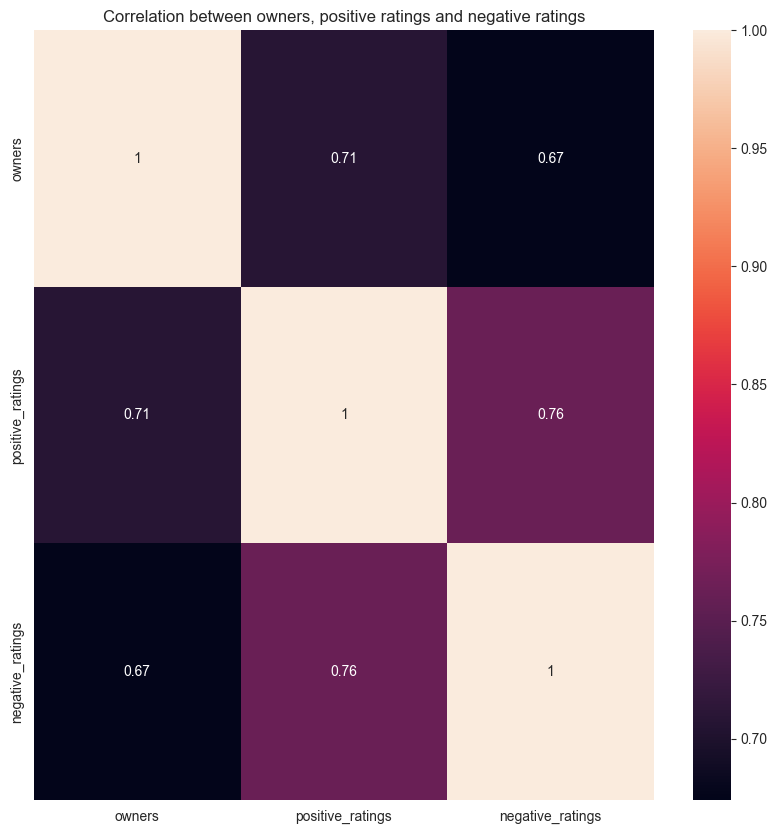

In [67]:
# display the owners and ratings in a heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(games[['owners', 'positive_ratings', 'negative_ratings']].corr(), annot=True, ax=ax)
plt.title('Correlation between owners, positive ratings and negative ratings')
plt.show()

# Written by Braydon

In [33]:
# table of all columns with their data type
data_types = pd.DataFrame(games.dtypes, columns=['Data Type']).reset_index()
data_types.columns = ['Column Name', 'Data Type']
data_types

# Written by Braydon

,Column Name,Data Type
0,appid,int64
1,name,object
2,release_date,datetime64[ns]
3,english,boolean
4,developer,category
5,publisher,category
6,platforms,object
7,required_age,category
8,categories,object
9,genres,object


In [34]:
# get the standard stats for each column
games.describe()

# Written by Braydon

,appid,release_date,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
count,2.707500e+04,27075,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,2.707500e+04,27075.000000
mean,5.962035e+05,2016-12-31 14:21:17.252077568,45.248864,1.000559e+03,211.027147,149.804949,146.05603,5.396380e+04,6.078193
min,1.000000e+01,1997-06-30 00:00:00,0.000000,0.000000e+00,0.000000,0.000000,0.00000,1.000000e+04,0.000000
25%,4.012300e+05,2016-04-04 00:00:00,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.000000e+04,1.690000
50%,5.990700e+05,2017-08-08 00:00:00,7.000000,2.400000e+01,9.000000,0.000000,0.00000,1.000000e+04,3.990000
75%,7.987600e+05,2018-06-06 12:00:00,23.000000,1.260000e+02,42.000000,0.000000,0.00000,1.500000e+04,7.190000
max,1.069460e+06,2019-05-01 00:00:00,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,5.000000e+07,421.990000
std,2.508942e+05,NaN,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,4.601526e+05,7.874922


In [ ]:
# pie chart of english vs non english games
fig = px.pie(games, names='english', title='English vs Non-English Games')
fig.show()

# Written by Braydon

In [83]:
# bar graph of the number of games on each platform
fig = px.bar(games['platforms'].explode().value_counts(), x=games['platforms'].explode().value_counts().index, y=games['platforms'].explode().value_counts().values)
fig.update_layout(title='Number of games per platform', xaxis_title='Platform', yaxis_title='Number of games')
fig.show()

# Written by Braydon

In [ ]:
# pi chart of the average playtime per game grouped into categories
fig = px.pie(games, names=pd.cut(games['average_playtime'], bins=[0, 1, 100, 10000, 20000, 50000, np.inf ], right=False).astype('str'), title='Average playtime per game')
fig.update_legends(title='Minutes')
fig.show()

# Written by Braydon

In [ ]:
#pi chart of the median playtime per game grouped into categories
fig = px.pie(games, names=pd.cut(games['median_playtime'], bins=[0, 1, 100, 10000, 20000, 50000, np.inf ], right=False).astype('str'), title='Median playtime per game')
fig.update_legends(title='Minutes')
fig.show()

# Written by Braydon

In [64]:
# pie chart of the number of games with more positive ratings than negative ratings

fig = px.pie(games, names=games['positive_ratings'] > games['negative_ratings'], title='General Ratings of Games')
fig.update_legends(title = 'More positive')
fig.show()

# Written by Braydon

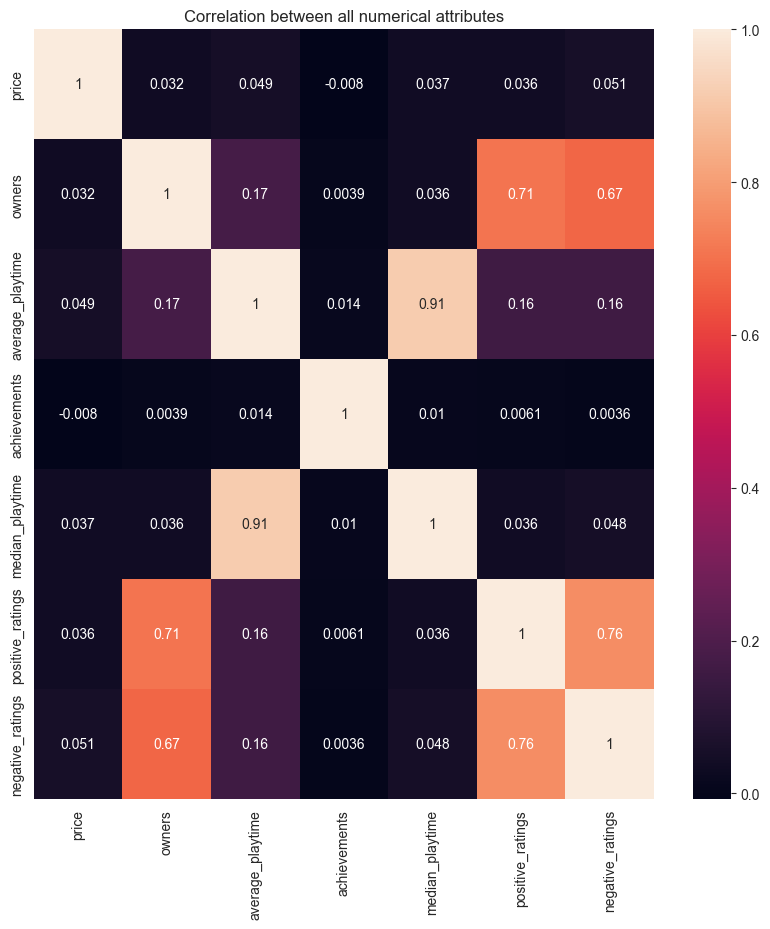

In [79]:
# display correlation between price and number of owners
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(games[['price', 'owners', 'average_playtime', 'achievements', 'median_playtime', 'positive_ratings', 'negative_ratings']].corr(), annot=True, ax=ax)
plt.title('Correlation between all numerical attributes')
plt.show()

# Written by Braydon

In [3]:
# find the game with the most achievments
games.sort_values(by='achievements', ascending=False).head(10)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
12604,573060,LOGistICAL,2017-02-15,True,Sacada,Sacada,"(windows,)",0,"(Single-player, Steam Achievements, Steam Trad...","(Casual, Indie, Strategy)","(Casual, Strategy, Indie)",9821,125,35,0,0,25000.0,6.99
14735,640310,Drive-By Hero,2017-06-19,True,Idea Cabin,Idea Cabin,"(windows, mac, linux)",0,"(Single-player, Steam Achievements)","(Violent, Gore, Action, Casual, Indie, Early A...","(Early Access, Action, Indie)",5394,45,78,0,0,10000.0,1.59
20246,796900,Trivia Vault: Mixed Trivia 2,2018-02-13,True,Ripknot Systems,Ripknot Systems,"(windows,)",0,"(Single-player, Steam Achievements)","(Action, Casual, Indie, Simulation)","(Indie, Casual, Simulation)",5000,15,7,0,0,10000.0,14.99
16525,690240,Trivia Vault: Classic Rock Trivia,2017-08-17,True,Ripknot Systems,Ripknot Systems,"(windows,)",0,"(Single-player, Steam Achievements)","(Action, Casual, Indie, Simulation, Strategy)","(Strategy, Casual, Action)",5000,30,12,0,0,10000.0,9.99
16414,687490,Trivia Vault: Super Heroes Trivia,2017-08-15,True,Ripknot Systems,Ripknot Systems,"(windows,)",0,"(Single-player, Steam Achievements)","(Casual, Indie, Simulation, Strategy)","(Strategy, Indie, Casual)",5000,28,17,0,0,10000.0,9.99
22026,851520,Trivia Vault: TV Trivia,2018-05-03,True,Ripknot Systems,Ripknot Systems,"(windows,)",0,"(Single-player, Steam Achievements)","(Action, Casual, Simulation, Strategy)","(Strategy, Casual, Simulation)",5000,8,7,0,0,10000.0,9.99
16630,693250,Panda Run,2017-08-31,True,Jam,Jam,"(windows,)",0,"(Single-player, Steam Achievements)","(Adventure, Casual, Indie)","(Adventure, Indie, Casual)",5000,14,19,0,0,10000.0,0.79
15296,658430,Professor Watts Word Search: Into The Ocean,2017-07-16,True,Ripknot Systems,Ripknot Systems,"(windows,)",0,"(Single-player, Steam Achievements)","(Casual, Indie, Strategy)","(Indie, Casual, Strategy)",5000,16,9,0,0,10000.0,4.99
21961,849550,Depth Siege Atlantis,2018-05-04,True,Red Dolphin Games,VT Publishing,"(windows,)",0,"(Single-player, Steam Achievements)","(Action, Casual)","(Action, Casual)",5000,12,16,0,0,10000.0,3.99
16351,685390,Pain Train PainPocalypse,2017-08-11,True,Virtual Top,VT Publishing,"(windows,)",0,"(Single-player, Steam Achievements)","(Action, Indie)","(Action, Indie, Gore)",5000,31,37,0,0,10000.0,3.99
